# Credit Card Fraud Detection

## 0. Setting the Scene

In [1]:
!pip install -U scikit-learn==1.4.2 imbalanced-learn==0.12.0
# SMOTEÎ•º ÏÇ¨Ïö©Ìï¥ ÌÅ¥ÎûòÏä§ Î∂àÍ∑†ÌòïÏùÑ Ìï¥Í≤∞ÌïòÍ≥†, K-ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ(KNN) Î∂ÑÎ•òÍ∏∞Î•º ÌïôÏäµÌïòÎäî ÏΩîÎìú

  Using cached imbalanced_learn-0.12.0-py3-none-any.whl.metadata (8.2 kB)
Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-0.14.0:
      Successfully uninstalled imbalanced-learn-0.14.0


In [2]:
!pip install -U lightgbm xgboost imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [4]:
%matplotlib inline

In [5]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

## 1. EDA

### 1.0 exploring the data

* Í∞Å ÌîºÏ≤òÏóê ÎåÄÌïú Ïù¥Ìï¥ÎèÑ, Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ÏôÄ ÌäπÏÑ±ÏùÑ ÌååÏïÖÌïòÍ∏∞ ÏúÑÌïú ÏãúÍ∞ÅÌôî, Ïù¥Î•º ÌÜµÌïòÏó¨ Ïú†ÏùòÎØ∏Ìïú Ïù∏ÏÇ¨Ïù¥Ìä∏Ïùò ÎèÑÏ∂ú
* especially fraud dataÎ•º ÌôïÏù∏ÌïòÎäî Í≤ΩÏö∞, Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ±Ïùò ÏàòÍ∞Ä Ïù¥ÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎ≥¥Îã§ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎßéÏùå (ÏßÄÎèÑÌïôÏäµÏùÑ Ìï† Í≤ΩÏö∞ ÌãÅÌûà, Í∑πÎèÑÎ°ú Î∂àÍ∑†ÌòïÌïú Îç∞Ïù¥Î∏î Í∞íÏùÑ Í∑πÎ≥µÌïòÍ∏∞ ÏúÑÌï¥ Ï∂©Î∂ÑÌïú ÏñëÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöîÌï®)
* ÏÉòÌîåÎßÅ Í∏∞Î≤ïÏùò ÌôúÏö© (Ïò§Î≤Ñ ÏÉòÌîåÎßÅ VS Ïñ∏Îçî ÏÉòÌîåÎßÅ)

In [6]:
print(train.shape, test.shape)
train.head()

(170883, 32) (113923, 31)


id  Time        V1        V2        V3        V4        V5        V6  \
0   0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1   1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2   2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3   3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4   4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8  ...       V21       V22       V23       V24       V25  \
0  0.239599  0.098698  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1 -0.078803  0.085102  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.791461  0.247676  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.237609  0.377436  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4  0.592941 -0.270533  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 32 columns]

In [7]:
test.head()

id      Time        V1        V2        V3        V4        V5  \
0  170883  120396.0 -2.410892 -1.264333 -0.787460 -0.212152  1.139859   
1  170884  120396.0 -1.394526  0.284790  2.979226  0.362345 -1.344546   
2  170885  120396.0  0.140378  0.989574 -0.506447  0.480553  1.407763   
3  170886  120396.0 -1.303150  0.187865  0.944395 -1.277834  1.236744   
4  170887  120396.0  1.947883 -1.095332 -1.392121 -0.600598 -0.320840   

         V6        V7        V8  ...       V20       V21       V22       V23  \
0 -2.030200  0.533818 -0.194852  ... -0.558831 -0.076699  0.054816 -1.243901   
1  2.278858 -1.836101 -1.797895  ... -0.807798  1.945416 -0.539926 -0.446763   
2  0.371637  0.811775  0.067702  ...  0.120841  0.385872  1.302941 -0.177157   
3 -1.301696  1.402234 -0.558914  ... -0.251346 -0.274175 -0.656826 -0.164985   
4  0.048953 -0.443486 -0.081011  ... -0.293448 -0.250594 -0.385151  0.099030   

        V24       V25       V26       V27       V28  Amount  
0  0.147148  0.974330  1.309377  0.083660 -0.611166  124.98  
1 -0.521142  0.405680 -0.149237  0.458944 -0.071516   50.00  
2 -0.192410 -0.724567 -0.433276  0.540947  0.323866    8.69  
3  0.001284 -0.001842 -0.024050 -0.436872  0.051705   59.99  
4  0.221922 -0.212846  0.586637 -0.071616 -0.045475  119.97  

[5 rows x 31 columns]

In [8]:
train["id"].max(), test["id"].min()

(170882, 170883)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [10]:
train.describe()

id           Time             V1             V2  \
count  170883.000000  170883.000000  170883.000000  170883.000000   
mean    85441.000000   61091.567090      -0.169838       0.040771   
std     49329.817362   27828.109419       1.850529       1.610874   
min         0.000000       0.000000     -56.407510     -72.715728   
25%     42720.500000   41216.500000      -0.986667      -0.539174   
50%     85441.000000   60776.000000      -0.183560       0.109679   
75%    128161.500000   78622.000000       1.184446       0.804221   
max    170882.000000  120396.000000       2.439207      22.057729   

                  V3             V4             V5             V6  \
count  170883.000000  170883.000000  170883.000000  170883.000000   
mean        0.493037       0.117429      -0.176102       0.058235   
std         1.383241       1.371910       1.338609       1.295123   
min       -33.680984      -5.519697     -42.147898     -26.160506   
25%        -0.064747      -0.743475      -0.828769      -0.691129   
50%         0.623352       0.124307      -0.226228      -0.202634   
75%         1.297352       0.937632       0.374445       0.449200   
max         9.382558      16.875344      34.801666      22.529298   

                  V7             V8  ...            V21            V22  \
count  170883.000000  170883.000000  ...  170883.000000  170883.000000   
mean       -0.080669       0.032227  ...      -0.028287      -0.083744   
std         1.208518       1.227630  ...       0.743713       0.667318   
min       -43.557242     -73.216718  ...     -34.830382     -10.933144   
25%        -0.586314      -0.162638  ...      -0.230722      -0.546777   
50%        -0.031932       0.056664  ...      -0.054462      -0.066786   
75%         0.462616       0.350995  ...       0.128337       0.363165   
max        36.677268      20.007208  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  170883.000000  170883.000000  170883.000000  170883.000000   
mean       -0.022450       0.009008       0.092269       0.012603   
std         0.584508       0.598760       0.465505       0.490660   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.170294      -0.332459      -0.195933      -0.330346   
50%        -0.036211       0.059474       0.135662      -0.058966   
75%         0.098707       0.415860       0.399458       0.272938   
max        19.002942       4.022866       7.519589       3.517346   

                 V27            V28         Amount          Class  
count  170883.000000  170883.000000  170883.000000  170883.000000  
mean        0.002093       0.002445      87.336704       0.002107  
std         0.391951       0.307315     245.954429       0.045851  
min       -22.565679     -11.710896       0.000000       0.000000  
25%        -0.065125      -0.027054       5.480000       0.000000  
50%         0.008693       0.021152      21.890000       0.000000  
75%         0.089727       0.078302      76.720000       0.000000  
max        12.152401      33.847808   19656.530000       1.000000  

[8 rows x 32 columns]

In [11]:
train["Class"].value_counts(normalize=True)*100
#Î∂àÍ∑†ÌòïÏùò Ï†ïÎèÑÎ•º ÌôïÏù∏

Class
0    99.78933
1     0.21067
Name: proportion, dtype: float64

### 1.1. Ïù¥ÏÉÅÏπò ÌôïÏù∏

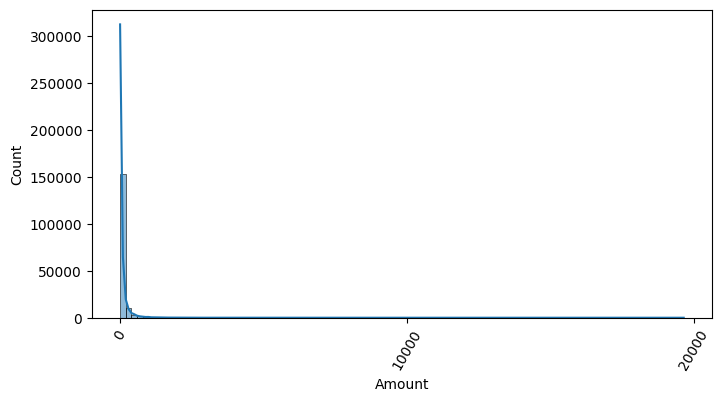

In [12]:
plt.figure (figsize=(8,4))
plt.xticks(range(0, 30000, 10000), rotation=60)
sns.histplot(train['Amount'], bins=100, kde=True)
plt.show()

### 1.2. Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [13]:
for col in train.columns:
    msg = 'column: {:>10}\t Percentage of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

# This loop iterates through every column in the train DataFrame
# and prints the percentage of missing (NaN) values for each column.
#
# 1. train.columns ‚Üí retrieves all column names in the DataFrame
# 2. train[col].isnull().sum() ‚Üí counts the number of NaN values in that column
# 3. train[col].shape[0] ‚Üí gives the total number of rows in that column
# 4. (NaN count / total rows) * 100 ‚Üí calculates the percentage of missing values
# 5. String formatting (format) is used to align and format the output:
#    - {:>10} ‚Üí right-aligns the column name in a field of width 10
#    - {:.2f}% ‚Üí displays the percentage with two decimal places


column:         id	 Percentage of NaN value: 0.00%
column:       Time	 Percentage of NaN value: 0.00%
column:         V1	 Percentage of NaN value: 0.00%
column:         V2	 Percentage of NaN value: 0.00%
column:         V3	 Percentage of NaN value: 0.00%
column:         V4	 Percentage of NaN value: 0.00%
column:         V5	 Percentage of NaN value: 0.00%
column:         V6	 Percentage of NaN value: 0.00%
column:         V7	 Percentage of NaN value: 0.00%
column:         V8	 Percentage of NaN value: 0.00%
column:         V9	 Percentage of NaN value: 0.00%
column:        V10	 Percentage of NaN value: 0.00%
column:        V11	 Percentage of NaN value: 0.00%
column:        V12	 Percentage of NaN value: 0.00%
column:        V13	 Percentage of NaN value: 0.00%
column:        V14	 Percentage of NaN value: 0.00%
column:        V15	 Percentage of NaN value: 0.00%
column:        V16	 Percentage of NaN value: 0.00%
column:        V17	 Percentage of NaN value: 0.00%
column:        V18	 Percentage 

### 1.3 Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï†úÍ±∞ÌïòÍ∏∞

In [14]:
# 1. Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Ìï®Ïàò (Outlier Detection)
# IQR(ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑ)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÜåÏàò ÌÅ¥ÎûòÏä§(ÏÇ¨Í∏∞) ÎÇ¥Ïùò Ïù¥ÏÉÅÏπòÎ•º ÌÉêÏßÄ.

def get_outlier(df: pd.DataFrame, column: str, weight: float = 1.5) -> np.ndarray:
    """
    ÌäπÏ†ï Ïª¨ÎüºÏóêÏÑú IQR Î∞©ÏãùÏúºÎ°ú Ïù¥ÏÉÅÏπò Ìñâ Ïù∏Îç±Ïä§Î•º Î∞òÌôòÌï©ÎãàÎã§.
    (Ïù¥ ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑúÎäî 'Class'Í∞Ä 1Ïù∏ ÏÇ¨Í∏∞ Îç∞Ïù¥ÌÑ∞ÎßåÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÏÉÅÏπòÎ•º ÌÉêÏßÄÌï©ÎãàÎã§.)

    Args:
        df: ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
        column: Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Í∏∞Ï§ÄÏù¥ Îê† Ïª¨Îüº Ïù¥Î¶Ñ
        weight: IQR Î≤îÏúÑÏóê Ï†ÅÏö©Ìï† Í∞ÄÏ§ëÏπò (Í∏∞Î≥∏Í∞í 1.5)

    Returns:
        Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎã®Îêú ÌñâÏùò Ïù∏Îç±Ïä§ Î∞∞Ïó¥
    """
    # ÏÇ¨Í∏∞(Class=1) Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
    fraud = df[df["Class"] == 1][column]

    # IQR Í≥ÑÏÇ∞
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    iqr = q75 - q25
    iqr_weight = iqr * weight

    # Ïù¥ÏÉÅÏπò Î≤îÏúÑ ÏÑ§Ï†ï
    lower_bound = q25 - iqr_weight
    upper_bound = q75 + iqr_weight

    # Ïù¥ÏÉÅÏπòÏóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
    outlier_idx = fraud[(fraud < lower_bound) | (fraud > upper_bound)].index
    return outlier_idx


# 2. Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò (ÌÜµÌï© Î≤ÑÏ†Ñ)
def get_preprocessed_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Credit Card Fraud Detection Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
    1. 'Amount' Ïª¨ÎüºÏóê Î°úÍ∑∏ Î≥ÄÌôòÏùÑ Ï†ÅÏö©Ìïú 'Amount_Scaled' Ïª¨ÎüºÏùÑ ÏÇΩÏûÖÌï©ÎãàÎã§.
    2. Î∂àÌïÑÏöîÌïú 'Time'Í≥º ÏõêÎûò 'Amount' Ïª¨ÎüºÏùÑ Ï†úÍ±∞Ìï©ÎãàÎã§.
    3. 'V14' Ïª¨Îüº Í∏∞Ï§ÄÏúºÎ°ú ÌÉêÏßÄÎêú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï©ÎãàÎã§.

    Args:
        df: ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

    Returns:
        Ï†ÑÏ≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    """
    df_copy = df.copy()

    # Î°úÍ∑∏ Î≥ÄÌôòÎêú Amount_Scaled ÏÇΩÏûÖ (Î°úÍ∑∏ Î≥ÄÌôòÏùÄ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÌôîÌïòÏó¨ Î™®Îç∏ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄ)
    df_copy.insert(0, 'Amount_Scaled', np.log1p(df_copy['Amount']))

    # Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞
    # 'Time'ÏùÄ ÏÑ†ÌòïÏ†Å ÏãúÍ∞Ñ Ï†ïÎ≥¥Ïù¥Î©∞, 'Amount'Îäî Ïä§ÏºÄÏùºÎßÅÎêú Î≤ÑÏ†ÑÏúºÎ°ú ÎåÄÏ≤¥ÎêòÏóàÏúºÎØÄÎ°ú Ï†úÍ±∞
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

    # V14 Í∏∞Ï§ÄÏúºÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ (V14Îäî ÏÇ¨Í∏∞ÏôÄ ÎÜíÏùÄ Ïó∞Í¥ÄÏÑ±ÏùÑ Î≥¥Ïù¥Îäî PCA Î≥ÄÏàò)
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(index=outlier_index, inplace=True)

    return df_copy


# 3. ÌïôÏäµ/ÌÖåÏä§Ìä∏ÏÖã Î∂ÑÎ¶¨ Ìï®Ïàò
def get_train_test_dataset(df: pd.DataFrame):
    """
    Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïôÏäµ(Train) Î∞è ÌÖåÏä§Ìä∏(Test) ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨Ìï©ÎãàÎã§.
    Nan Í∞íÏù¥ Ìè¨Ìï®Îêú ÌñâÏùÄ Ï†úÍ±∞Ìï©ÎãàÎã§.

    Args:
        df: ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ

    Returns:
        X_train, X_test, y_train, y_test (ÌäπÏßï Î∞è ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏)
    """
    df_copy = get_preprocessed_df(df)

    # Drop rows with NaN in the target variable ('Class')
    df_copy.dropna(subset=['Class'], inplace=True)

    # ÎßàÏßÄÎßâ Ïª¨Îüº('Class')ÏùÑ ÌÉÄÍ≤ü(y)ÏúºÎ°ú, ÎÇòÎ®∏ÏßÄÎ•º ÌäπÏßï(X)ÏúºÎ°ú ÏÑ§Ï†ï
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]

    # Stratify=y_targetÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌÉÄÍ≤ü ÌÅ¥ÎûòÏä§(ÏÇ¨Í∏∞/Ï†ïÏÉÅ) ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÎ©∞ Î∂ÑÎ¶¨
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)

    return X_train, X_test, y_train, y_test

In [15]:
#backup ÌååÏùº ÎßåÎì§Ïñ¥ÎëêÍ∏∞
train2 = train.copy()

In [16]:
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

In [17]:
print('ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î†àÏù¥Î∏î Í∞í ÎπÑÏú®')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î†àÏù¥Î∏î Í∞í ÎπÑÏú®')
print(y_test.value_counts()/y_test.shape[0] * 100)

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î†àÏù¥Î∏î Í∞í ÎπÑÏú®
Class
0    99.790998
1     0.209002
Name: count, dtype: float64
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î†àÏù¥Î∏î Í∞í ÎπÑÏú®
Class
0    99.791277
1     0.208723
Name: count, dtype: float64


### 1.4. Testing

In [18]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    """Î™®Îç∏Ïùò ÏòàÏ∏° ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÎäî Ìï®Ïàò"""
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    # Í≤∞Í≥ºÎ•º Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Ïò§Ï∞® ÌñâÎ†¨ (Confusion Matrix)')
    print(confusion)
    print(f'Ï†ïÌôïÎèÑ(Accuracy): {accuracy:.4f}, Ï†ïÎ∞ÄÎèÑ(Precision): {precision:.4f}')
    print(f'Ïû¨ÌòÑÏú®(Recall): {recall:.4f}, F1-Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}')

In [19]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

### 1.4.1. Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú ÌôïÏù∏

In [20]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3Ïû•ÏóêÏÑú ÏÇ¨Ïö©Ìïú get_clf_eval() Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌèâÍ∞Ä ÏàòÌñâ.
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Ïò§Ï∞® ÌñâÎ†¨ (Confusion Matrix)
[[51143    14]
 [   43    64]]
Ï†ïÌôïÎèÑ(Accuracy): 0.9989, Ï†ïÎ∞ÄÎèÑ(Precision): 0.8205
Ïû¨ÌòÑÏú®(Recall): 0.5981, F1-Score: 0.6919, ROC AUC: 0.9274


### 1.4.2. Light GBMÎ°ú ÌôïÏù∏

In [21]:
# Ïù∏ÏûêÎ°ú ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò EstimatorÍ∞ùÏ≤¥ÏôÄ, ÌïôÏäµ/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏûÖÎ†• Î∞õÏïÑÏÑú ÌïôÏäµ/ÏòàÏ∏°/ÌèâÍ∞Ä ÏàòÌñâ.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [22]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,  verbose=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

Ïò§Ï∞® ÌñâÎ†¨ (Confusion Matrix)
[[51153     4]
 [   18    89]]
Ï†ïÌôïÎèÑ(Accuracy): 0.9996, Ï†ïÎ∞ÄÎèÑ(Precision): 0.9570
Ïû¨ÌòÑÏú®(Recall): 0.8318, F1-Score: 0.8900, ROC AUC: 0.9769


### 1.4.3. XG BOOSTERÎ°ú ÌôïÏù∏

In [23]:
from xgboost import XGBClassifier

# 1. XGBoost Î∂ÑÎ•òÍ∏∞ ÏÉùÏÑ±
xgb_clf = XGBClassifier(n_estimators=1000, use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Î™®Îç∏ ÌïôÏäµ
xgb_clf.fit(X_train, y_train)

# 3. ÏòàÏ∏°
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

# 4. ÌèâÍ∞Ä
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

Ïò§Ï∞® ÌñâÎ†¨ (Confusion Matrix)
[[51126    31]
 [   24    83]]
Ï†ïÌôïÎèÑ(Accuracy): 0.9989, Ï†ïÎ∞ÄÎèÑ(Precision): 0.7281
Ïû¨ÌòÑÏú®(Recall): 0.7757, F1-Score: 0.7511, ROC AUC: 0.9107


## 2. Feacture Engineering
* Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì± Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†úÍ∞Ä Ï†ÅÏ†àÌïòÍ≤å ÏàòÌñâÎêòÏóàÎäîÍ∞Ä?
* Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ Î∞è Ïù∏ÏΩîÎî© Îì±Ïù¥ Ï†ÅÏ†àÌûà ÏàòÌñâÎêòÏóàÎäîÍ∞Ä?

<Axes: >

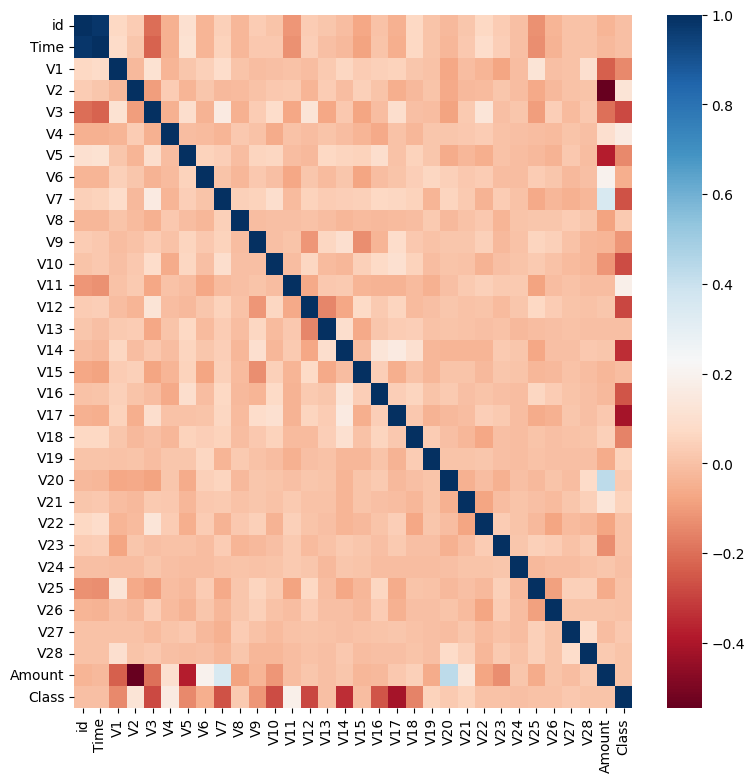

In [24]:
plt.figure(figsize=(9, 9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

#ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÑ ÏàòÎ°ù Îπ®Í∞ÑÏÉâ, V17Ïóê Ìï¥ÎãπÌïòÎäî Í≤ΩÏö∞Îßå Ïù¥ÏÉÅÏπòÎ•º Ï∞æÏïÑÏÑú Ï†úÍ±∞ÌïòÍ∏∞

In [25]:
# V1Î∂ÄÌÑ∞ V28ÍπåÏßÄ Ïù¥ÏÉÅÏπò Ïù∏Îç±Ïä§ Ï∂úÎ†•
for i in range(1, 29):
    col_name = f'V{i}'

    # Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÎäî Ïª¨ÎüºÏù¥ ÏûàÏùÑ Í≤ΩÏö∞ Í±¥ÎÑàÎõ∞Í∏∞ (Ïòà: V13Ïù¥ ÏóÜÍ±∞ÎÇò Ï†úÍ±∞Îêú Í≤ΩÏö∞)
    if col_name not in train.columns:
        print(f'{col_name} Ïª¨Îüº ÏóÜÏùå - Í±¥ÎÑàÎúÄ')
        continue

    outlier_index = get_outlier(df=train, column=col_name, weight=1.5)
    print(f'{col_name} Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§:', outlier_index.tolist())

#Í∑∏Îü¨ÎÇò Ïù¥ÏÉÅÏπò Ï†úÍ±∞Í∞Ä Ï†ïÌôïÎèÑ

V1 Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§: [15451, 15476, 15506, 15539, 15566, 15736, 15751, 15781, 15810, 16780, 17317, 17366, 17407, 17453, 17480, 44270, 151006, 151007, 151008, 151009, 153835, 154234, 154371, 154587, 154684]
V2 Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§: [15781, 15810, 16780, 17317, 17366, 17407, 17453, 17480, 82400, 151006, 151007, 151008, 151009, 153823, 153835, 154234, 154371, 154587, 154684]
V3 Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§: [16780, 17317, 17366, 17407, 17453, 17480, 151006, 151007, 151008, 151009]
V4 Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§: []
V5 Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§: [15539, 15566, 15736, 15751, 15781, 15810, 16780, 17317, 17366, 17407, 17453, 17480, 151006, 151007, 151008, 151009, 154286, 154587, 154684]
V6 Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§: [6971, 89190, 102441, 102442, 102443, 102444, 102445, 102446, 154371, 154587, 154684]
V7 Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§: [151006, 151007, 151008, 151009, 153823, 153835, 154234, 154371, 154587, 154684]
V8 Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§: [14170, 14197

In [26]:
# ‚úÖ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Ìï®Ïàò (V14Îßå)
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df["Class"]==1][column]
    q25 = np.percentile(fraud.values, 25)
    q75 = np.percentile(fraud.values, 75)
    iqr = q75 - q25
    iqr_weight = iqr * weight
    lowest_val = q25 - iqr_weight
    highest_val = q75 + iqr_weight
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

# ‚úÖ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò (Î°úÍ∑∏ Î≥ÄÌôò + V14Îßå Ïù¥ÏÉÅÏπò Ï†úÍ±∞)
def get_preprocessed_df(df):
    df_processed = df.copy()
    df_processed.insert(0, 'Amount_Scaled', np.log1p(df_processed['Amount']))
    df_processed.drop(['Time', 'Amount'], axis=1, inplace=True)
    outlier_index = get_outlier(df_processed, column='V14', weight=1.5)
    df_processed.drop(index=outlier_index, inplace=True)
    return df_processed

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨ Ìï®Ïàò
def get_train_test_dataset(df):
    df_cleaned = get_preprocessed_df(df)
    X = df_cleaned.drop(columns=['Class'])
    y = df_cleaned['Class']
    return train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# ÌèâÍ∞Ä Ìï®Ïàò
def get_model_train_eval(model, ftr_train, ftr_test, tgt_train, tgt_test):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    confusion = confusion_matrix(tgt_test, pred)
    accuracy = accuracy_score(tgt_test, pred)
    precision = precision_score(tgt_test, pred)
    recall = recall_score(tgt_test, pred)
    f1 = f1_score(tgt_test, pred)
    roc_auc = roc_auc_score(tgt_test, pred_proba)
    print("Ïò§Ï∞® ÌñâÎ†¨")
    print(confusion)
    print(f"Ï†ïÌôïÎèÑ: {accuracy:.4f}, Ï†ïÎ∞ÄÎèÑ: {precision:.4f}, Ïû¨ÌòÑÏú®: {recall:.4f}, f1Ïä§ÏΩîÏñ¥: {f1:.4f}, roc-auc: {roc_auc:.4f}")

## 3. Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä

In [27]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = get_train_test_dataset(train)

# SMOTE Ï†ÅÏö©
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [28]:
# Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
print("### Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏòàÏ∏° ÏÑ±Îä• ###")
lr_model = LogisticRegression(max_iter=1000)
get_model_train_eval(lr_model, X_train_over, X_test, y_train_over, y_test)

print("\n### LightGBM ÏòàÏ∏° ÏÑ±Îä• ###")
lgbm_model = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_model, X_train_over, X_test, y_train_over, y_test)

print("\n### XGBoost ÏòàÏ∏° ÏÑ±Îä• ###")
xgb_model = XGBClassifier(n_estimators=1000, use_label_encoder=False, eval_metric='logloss', random_state=42)
get_model_train_eval(xgb_model, X_train_over, X_test, y_train_over, y_test)

### Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏòàÏ∏° ÏÑ±Îä• ###
Ïò§Ï∞® ÌñâÎ†¨
[[50559   598]
 [   13    94]]
Ï†ïÌôïÎèÑ: 0.9881, Ï†ïÎ∞ÄÎèÑ: 0.1358, Ïû¨ÌòÑÏú®: 0.8785, f1Ïä§ÏΩîÏñ¥: 0.2353, roc-auc: 0.9698

### LightGBM ÏòàÏ∏° ÏÑ±Îä• ###
Ïò§Ï∞® ÌñâÎ†¨
[[51146    11]
 [   17    90]]
Ï†ïÌôïÎèÑ: 0.9995, Ï†ïÎ∞ÄÎèÑ: 0.8911, Ïû¨ÌòÑÏú®: 0.8411, f1Ïä§ÏΩîÏñ¥: 0.8654, roc-auc: 0.9793

### XGBoost ÏòàÏ∏° ÏÑ±Îä• ###
Ïò§Ï∞® ÌñâÎ†¨
[[51145    12]
 [   15    92]]
Ï†ïÌôïÎèÑ: 0.9995, Ï†ïÎ∞ÄÎèÑ: 0.8846, Ïû¨ÌòÑÏú®: 0.8598, f1Ïä§ÏΩîÏñ¥: 0.8720, roc-auc: 0.9821


In [29]:
from sklearn.model_selection import GridSearchCV

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear'],
    'max_iter': [100, 500, 1000]
}

lgbm_param_grid = {
    'num_leaves': [31, 64],
    'max_depth': [-1, 5],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 300]
}

xgb_param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 300],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearchCV ÌäúÎãù
print("üîç ÌäúÎãù Ï§ë...")

lr_gs = GridSearchCV(LogisticRegression(), lr_param_grid, scoring='f1', cv=3, n_jobs=-1)
lgbm_gs = GridSearchCV(LGBMClassifier(boost_from_average=False), lgbm_param_grid, scoring='f1', cv=3, n_jobs=-1)
xgb_gs = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_param_grid, scoring='f1', cv=3, n_jobs=-1)

lr_gs.fit(X_train_over, y_train_over)
lgbm_gs.fit(X_train_over, y_train_over)
xgb_gs.fit(X_train_over, y_train_over)

# ÏµúÏ†Å Î™®Îç∏
best_lr = lr_gs.best_estimator_
best_lgbm = lgbm_gs.best_estimator_
best_xgb = xgb_gs.best_estimator_

# ÌèâÍ∞Ä
print("\n‚úÖ ÏµúÏ¢Ö ÌèâÍ∞Ä Í≤∞Í≥º:")
print("\n### Logistic Regression (Best) ###")
get_model_train_eval(best_lr, X_train_over, X_test, y_train_over, y_test)

print("\n### LightGBM (Best) ###")
get_model_train_eval(best_lgbm, X_train_over, X_test, y_train_over, y_test)

print("\n### XGBoost (Best) ###")
get_model_train_eval(best_xgb, X_train_over, X_test, y_train_over, y_test)


üîç ÌäúÎãù Ï§ë...

‚úÖ ÏµúÏ¢Ö ÌèâÍ∞Ä Í≤∞Í≥º:

### Logistic Regression (Best) ###
Ïò§Ï∞® ÌñâÎ†¨
[[50650   507]
 [   14    93]]
Ï†ïÌôïÎèÑ: 0.9898, Ï†ïÎ∞ÄÎèÑ: 0.1550, Ïû¨ÌòÑÏú®: 0.8692, f1Ïä§ÏΩîÏñ¥: 0.2631, roc-auc: 0.9715

### LightGBM (Best) ###
Ïò§Ï∞® ÌñâÎ†¨
[[51146    11]
 [   17    90]]
Ï†ïÌôïÎèÑ: 0.9995, Ï†ïÎ∞ÄÎèÑ: 0.8911, Ïû¨ÌòÑÏú®: 0.8411, f1Ïä§ÏΩîÏñ¥: 0.8654, roc-auc: 0.9812

### XGBoost (Best) ###
Ïò§Ï∞® ÌñâÎ†¨
[[51144    13]
 [   15    92]]
Ï†ïÌôïÎèÑ: 0.9995, Ï†ïÎ∞ÄÎèÑ: 0.8762, Ïû¨ÌòÑÏú®: 0.8598, f1Ïä§ÏΩîÏñ¥: 0.8679, roc-auc: 0.9823


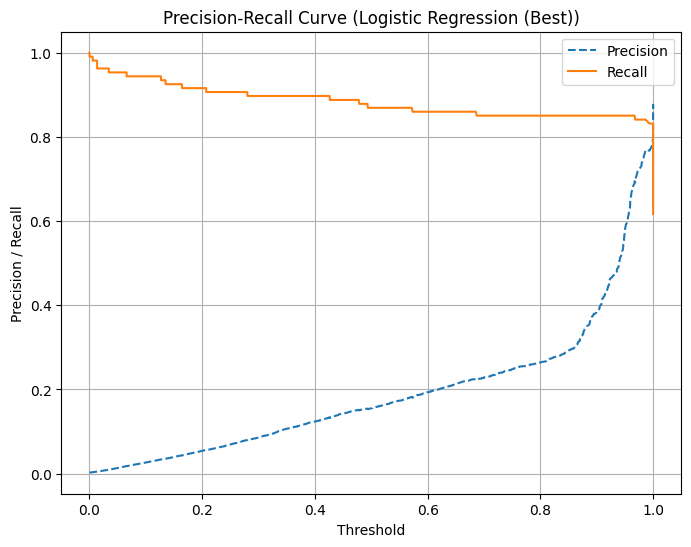

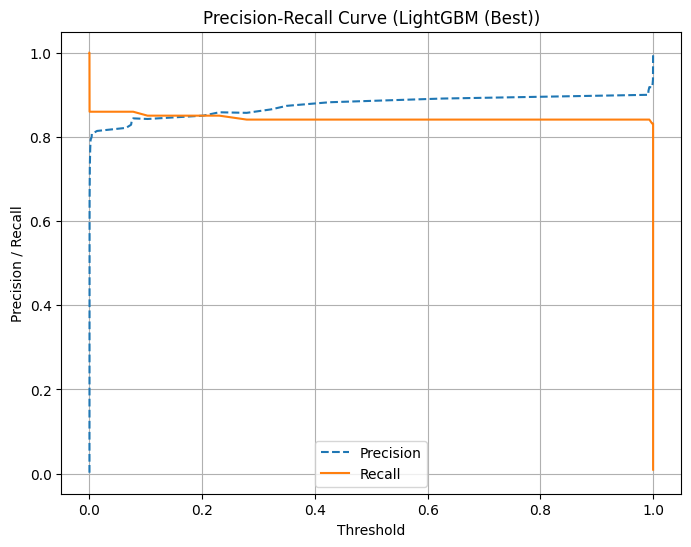

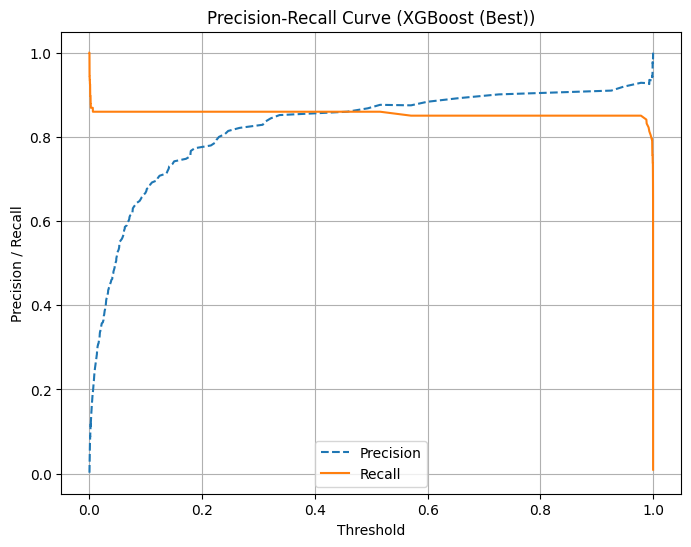

In [32]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# PR Ïª§Î∏å ÏãúÍ∞ÅÌôî Ìï®Ïàò
def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label='Recall')
    plt.xlabel('Threshold'); plt.ylabel('Precision / Recall')
    plt.title('Precision-Recall Curve (XGBoost Best)')
    plt.legend(); plt.grid(); plt.show()

# XGBoost ÌôïÎ•† ÏòàÏ∏°Í∞í Í∏∞Î∞ò Ïª§Î∏å Í∑∏Î¶¨Í∏∞
pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_xgb)



In [35]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ (Î°úÍ∑∏ Î≥ÄÌôòÎßå ÌïòÍ≥† Time, Amount Ï†úÍ±∞. idÎäî Ïú†ÏßÄ)
def preprocess_test_df(df):
    df_processed = df.copy()
    df_processed.insert(0, 'Amount_Scaled', np.log1p(df_processed['Amount']))
    df_processed.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_processed

# Ï†ÑÏ≤òÎ¶¨ Ï†ÅÏö©
test_processed = preprocess_test_df(test)

# sample_submission Î∂àÎü¨Ïò§Í∏∞
submission = pd.read_csv('/content/sample_submission.csv')

# XGBoost ÏòàÏ∏° (‚ùó id Ìè¨Ìï®Îêú test_processed ÏÇ¨Ïö©)
submission['Class'] = best_xgb.predict_proba(test_processed)[:, 1]

# Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû•
submission.to_csv("submission.csv", index=False)
print("‚úÖ submission.csv Ï†ÄÏû• ÏôÑÎ£å ‚Äî Ï∫êÍ∏ÄÏóê Ï†úÏ∂úÌïòÎ©¥ ÎèºÏöî!")

‚úÖ submission.csv Ï†ÄÏû• ÏôÑÎ£å ‚Äî Ï∫êÍ∏ÄÏóê Ï†úÏ∂úÌïòÎ©¥ ÎèºÏöî!
